In [64]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [65]:
months = {1: "01",
          2: "02",
          3: "03",
          4: "04",
          5: "05",
          6: "06",
          7: "07",
          8: "08",
          9: "09",
          10: "10",
          11: "11",
          12: "12"}

days_in_month = {1: 31,
                 2: 28,
                 3: 31,
                 4: 30,
                 5: 31,
                 6: 30,
                 7: 31,
                 8: 31,
                 9: 30,
                 10: 31,
                 11: 30,
                 12: 31}

days_to_str = {1: "01",
               2: "02",
               3: "03",
               4: "04",
               5: "05",
               6: "06",
               7: "07",
               8: "08",
               9: "09",
               10: "10",
               11: "11",
               12: "12",
               13: "13",
               14: "14",
               15: "15",
               16: "16",
               17: "17",
               18: "18",
               19: "19",
               20: "20",
               21: "21",
               22: "22",
               23: "23",
               24: "24",
               25: "25",
               26: "26",
               27: "27",
               28: "28",
               29: "29",
               30: "30",
               31: "31"}

In [66]:
# Calculates the average emission per day
def get_eng_day_range(curr_month, num_days, num):
    
    wh_hourly = pd.read_csv("LoadHourlyProfileData/HP_WH_HourlyProfiles.csv")
    sh_hourly = pd.read_csv("LoadHourlyProfileData/HP_SH_HourlyProfiles.csv")
    
    start = 0
    
    total_wh = 0
    total_sh = 0
    for i in range(0, (num_days * 24)):
        total_wh += float(wh_hourly.iloc[num[0], 1])
        total_sh += float(sh_hourly.iloc[num[0], 1])
        num[0] += 1
        
    return [total_wh, total_sh]

# Calculates the average emission per month
def get_eng_month_range(st_month, end_month, df, num):
    
    num_months = 0
    
    for i in range(st_month, end_month + 1):
        lis = get_eng_day_range(i, days_in_month[i], num) # Will just do the whole month
        df.iloc[i] = [lis[0], lis[1]]
        average_loads[i] = lis[0] + lis[1]
        num_months += 1
        
    return


# Calculates the annual emission from Jan 2020, Feb 2019 - Dec 2019 (simulate a full year)
def get_annual_eng(df):
    
    num = [0]
    get_eng_month_range(1, 12, df, num)

,HP_WH (kwh),HP_SH (kwh)
1,140.717,248.036
2,157.072,189.183
3,127.062,195.322
4,122.089,130.258
5,88.6445,78.7142
6,96.5514,35.9537
7,86.5789,28.6187
8,110.618,28.8533
9,82.5555,41.3749
10,109.996,74.669


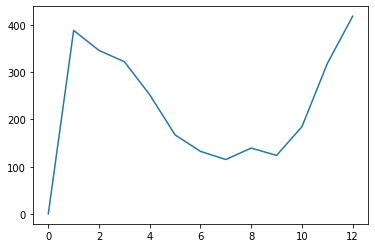

In [67]:
average_loads = np.zeros(13)
df = pd.DataFrame(index = [pd.Series(range(13)).values], columns = ["HP_WH (kwh)", "HP_SH (kwh)"])
get_annual_eng(df)
df = df.drop([0])
df.to_csv('sh_wh_eng.csv')

plt.plot(average_loads)

df